In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [9]:
df=pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")

In [10]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


****Cleaning process step by step****

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.isna().sum().sort_values(ascending=False).head(20)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [14]:
df.columns = df.columns.str.strip()
df = df.replace({'nan': np.nan, 'NaN': np.nan})


In [15]:
print('duplicates:', df.duplicated().sum())
df = df.drop_duplicates()

duplicates: 483


In [16]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [17]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce').fillna(0).astype(int)

In [18]:
df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True).str.strip()

In [19]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').astype('Int64') 

In [20]:
df['Price'] = df['Price'].astype(str).str.replace(r'[\$,]', '', regex=True).str.strip()

In [21]:
df.loc[df['Price'].str.lower().isin(['free','nan','none','0.0','0']), 'Price'] = '0'


In [22]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [23]:
df['Type'] = df['Type'].astype(str).str.strip().replace('nan', np.nan).str.title()

In [24]:
df['Category'] = df['Category'].astype(str).str.strip()

In [25]:
df['Genres'] = df['Genres'].astype(str).str.strip()

In [26]:
df['Content Rating'] = df['Content Rating'].astype(str).str.strip()

In [27]:
df['Primary_Genre'] = df['Genres'].str.split(';').str[0]

In [28]:
def parse_size(s):
    if pd.isna(s): return np.nan
    s = str(s).strip()
    if s.lower() == 'varies with device': return np.nan
    try:
        if s.endswith('M'):
            return float(s[:-1])
        if s.endswith('k'):
            return float(s[:-1]) / 1024.0
        return float(s)   # fallback
    except:
        return np.nan

df['Size_MB'] = df['Size'].apply(parse_size)


In [29]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [30]:
df['Days_Since_Update'] = (pd.Timestamp.now() - df['Last Updated']).dt.days

In [31]:
df.isna().sum().sort_values(ascending=False).head(30)


Size_MB              1527
Rating               1465
Current Ver             8
Android Ver             3
Installs                1
Type                    1
Price                   1
Last Updated            1
Days_Since_Update       1
App                     0
Category                0
Reviews                 0
Size                    0
Content Rating          0
Genres                  0
Primary_Genre           0
dtype: int64

In [32]:
df.to_csv('/kaggle/working/cleaned_googleplaystore.csv', index=False)


**Basic Level Questions**

**1.What is the average rating of apps in the dataset?**


In [33]:
avg_rating = df['Rating'].mean()

In [34]:
print(f"Average app rating: {avg_rating:.2f}")

Average app rating: 4.19


**2.How many unique categories of apps are there?**

In [35]:
unique_categories_count = df['Category'].nunique()

In [36]:
unique_categories = df['Category'].unique()

In [37]:
print(f"Number of unique categories: {unique_categories_count}")

Number of unique categories: 34


In [38]:
print("Categories:", unique_categories)

Categories: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


**3.What is the distribution of app sizes?**


In [39]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)

In [40]:
def size_to_mb(size):
    if isinstance(size, str):
        size = size.strip()
        if size.endswith('M'):
            return float(size.replace('M', ''))
        elif size.endswith('k'):
            return float(size.replace('k', '')) / 1024
        else:
            return np.nan  # if something unexpected like '1,000+'
    return size

df['Size'] = df['Size'].apply(size_to_mb)


In [41]:
print(df['Size'].unique())

[1.90000000e+01 1.40000000e+01 8.70000000e+00 2.50000000e+01
 2.80000000e+00 5.60000000e+00 2.90000000e+01 3.30000000e+01
 3.10000000e+00 2.80000000e+01 1.20000000e+01 2.00000000e+01
 2.10000000e+01 3.70000000e+01 2.70000000e+00 5.50000000e+00
 1.70000000e+01 3.90000000e+01 3.10000000e+01 4.20000000e+00
 7.00000000e+00 2.30000000e+01 6.00000000e+00 6.10000000e+00
 4.60000000e+00 9.20000000e+00 5.20000000e+00 1.10000000e+01
 2.40000000e+01            nan 9.40000000e+00 1.50000000e+01
 1.00000000e+01 1.20000000e+00 2.60000000e+01 8.00000000e+00
 7.90000000e+00 5.60000000e+01 5.70000000e+01 3.50000000e+01
 5.40000000e+01 1.96289062e-01 3.60000000e+00 5.70000000e+00
 8.60000000e+00 2.40000000e+00 2.70000000e+01 2.50000000e+00
 1.60000000e+01 3.40000000e+00 8.90000000e+00 3.90000000e+00
 2.90000000e+00 3.80000000e+01 3.20000000e+01 5.40000000e+00
 1.80000000e+01 1.10000000e+00 2.20000000e+00 4.50000000e+00
 9.80000000e+00 5.20000000e+01 9.00000000e+00 6.70000000e+00
 3.00000000e+01 2.600000

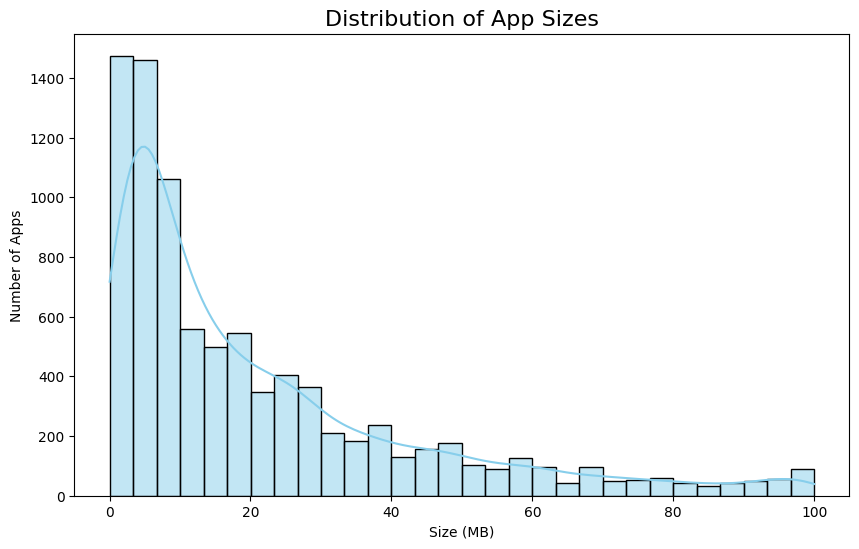

In [42]:
import seaborn as sb
mp.figure(figsize=(10, 6))
sb.histplot(df['Size'].dropna(), bins=30, kde=True, color='skyblue')
mp.title('Distribution of App Sizes', fontsize=16)
mp.xlabel('Size (MB)')
mp.ylabel('Number of Apps')
mp.show()


4.How many free vs paid apps are there?


In [38]:
type_counts = df['Type'].value_counts()

In [39]:
print(type_counts)

Type
Free    9591
Paid     765
0          1
Name: count, dtype: int64


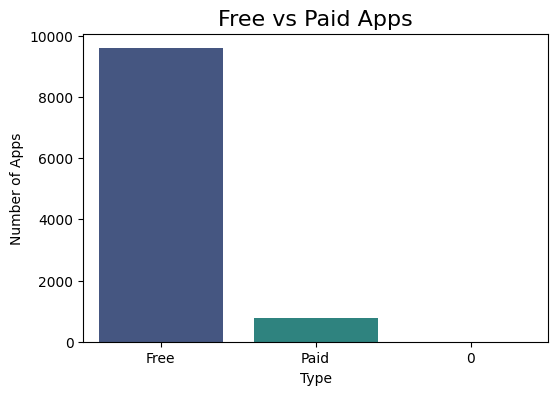

In [40]:
mp.figure(figsize=(6,4))
sb.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
mp.title('Free vs Paid Apps', fontsize=16)
mp.xlabel('Type')
mp.ylabel('Number of Apps')
mp.show()

**5.What is the most common content rating for apps?**


In [41]:
most_common_rating = df['Content Rating'].mode()[0]

In [42]:
print("Most Common Content Rating:", most_common_rating)

Most Common Content Rating: Everyone


**6.What are the top 5 most installed apps?**


In [43]:
df['Installs'] = (
    df['Installs']
    .astype(str)  
    .str.replace(',', '', regex=False)  
    .str.replace('+', '', regex=False)  
    .replace(['<NA>', 'nan', 'NaN'], '0')  
    .astype(int) )

In [44]:
top_5_installed = df.sort_values(by='Installs', ascending=False).head(5)

In [45]:
print(top_5_installed[['App', 'Installs']])

                            App    Installs
5856          Google Play Games  1000000000
4098  Maps - Navigate & Explore  1000000000
4150                     Google  1000000000
3943                   Facebook  1000000000
4144                    Google+  1000000000


**7.How many apps have a rating of 4.0 and above?**


In [47]:
high_rating_apps = df[df['Rating'].notna() & (df['Rating'] >= 4.0)]
count_high_rating = high_rating_apps.shape[0]

In [48]:
print(f"Number of apps with rating 4.0 and above: {count_high_rating}")

Number of apps with rating 4.0 and above: 6948


**8.What is the average number of reviews for free vs paid apps?**


In [49]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [50]:
df_clean = df.dropna(subset=['Reviews'])

In [51]:
avg_reviews = df_clean.groupby('Type')['Reviews'].mean().round(2)

In [52]:
print(avg_reviews)

Type
0            0.00
Free    437373.59
Paid     11900.55
Name: Reviews, dtype: float64


**9.What is the average app size for each category?**

In [53]:
avg_size = (
    df.assign(Size_MB=df['Size_MB'].fillna(0))
      .groupby('Category')['Size_MB']
      .mean()
      .round(2)
      .sort_values(ascending=False)
)

In [54]:
print(avg_size)

Category
GAME                   39.36
FAMILY                 25.96
SPORTS                 20.39
PARENTING              20.26
TRAVEL_AND_LOCAL       18.52
MEDICAL                18.05
AUTO_AND_VEHICLES      17.68
FOOD_AND_DRINK         17.43
HEALTH_AND_FITNESS     16.97
FINANCE                15.15
EDUCATION              14.83
DATING                 14.37
ENTERTAINMENT          13.66
LIFESTYLE              13.46
MAPS_AND_NAVIGATION    13.10
SHOPPING               12.85
PHOTOGRAPHY            12.70
EVENTS                 12.44
HOUSE_AND_HOME         12.38
BUSINESS               12.35
SOCIAL                 12.23
BEAUTY                 12.23
VIDEO_PLAYERS          12.04
ART_AND_DESIGN         11.80
COMICS                 11.46
BOOKS_AND_REFERENCE    11.24
LIBRARIES_AND_DEMO     10.69
PERSONALIZATION        10.30
NEWS_AND_MAGAZINES     10.01
PRODUCTIVITY            9.46
WEATHER                 9.12
COMMUNICATION           8.28
TOOLS                   7.69
1.9                     0.00
Name:

**10.How many apps were last updated in 2018?**


In [55]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [56]:
apps_2018 = df[df['Last Updated'].dt.year == 2018]

In [57]:
count_2018 = apps_2018.shape[0]

In [58]:
print("Number of apps last updated in 2018:", count_2018)

Number of apps last updated in 2018: 6934


**Medium Level Questions**

**1.What is the correlation between the number of installs and the app rating?**


In [59]:
df['Installs'] = df['Installs'].replace(r'[+,]', '', regex=True).astype(float)

In [60]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [61]:
corr_df = df[['Installs', 'Rating']].dropna()

In [62]:
correlation = corr_df['Installs'].corr(corr_df['Rating'])


In [63]:
print("Correlation between Installs and Rating:", correlation)

Correlation between Installs and Rating: 0.04814742958995648


**2.Which app categories have the highest average rating?**


In [64]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [65]:
avg_rating_per_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)


In [66]:
print(avg_rating_per_category)


Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.375969
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.347458
PERSONALIZATION         4.333871
PARENTING               4.300000
GAME                    4.281285
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.261450
SOCIAL                  4.254918
SHOPPING                4.251485
WEATHER                 4.244000
SPORTS                  4.225175
PRODUCTIVITY            4.201796
FAMILY                  4.191153
AUTO_AND_VEHICLES       4.190411
PHOTOGRAPHY             4.182895
MEDICAL                 4.182450
LIBRARIES_AND_DEMO      4.178462
HOUSE_AND_HOME          4.164706
FOOD_AND_DRINK          4.164151
COMICS                  4.155172
COMMUNICATION           4.151466
ENTERTAINMENT           4.136036
NEWS_AND_MAGAZINES      4.128505
FINANCE                 4.127445
BUSINESS                4.102593
LIFESTYLE               4.096066
TRAVEL_AND_LOCAL        4.094146
V

In [67]:
top5_categories = avg_rating_per_category.head(5)
print(top5_categories)


Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.375969
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.347458
Name: Rating, dtype: float64


**3.How does the price of an app affect its average rating?**


In [68]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [69]:
df_clean = df.dropna(subset=['Price', 'Rating'])


In [70]:
paid_apps = df_clean[df_clean['Price'] > 0]

In [71]:
price_rating = paid_apps.groupby('Price')['Rating'].mean().reset_index()


In [73]:
price_rating = price_rating.sort_values(by='Price')

In [74]:
print(price_rating)

     Price    Rating
0     0.99  4.298095
1     1.00  4.450000
2     1.20  4.200000
3     1.29  4.100000
4     1.49  4.196774
..     ...       ...
67  299.99  3.800000
68  379.99  2.900000
69  389.99  3.600000
70  399.99  4.009091
71  400.00  3.600000

[72 rows x 2 columns]


**4.What is the distribution of app ratings across different content ratings?**


In [ ]:
df['Content Rating'] = df['Content Rating'].astype(str)  


In [75]:
df_clean = df.dropna(subset=['Rating', 'Content Rating'])

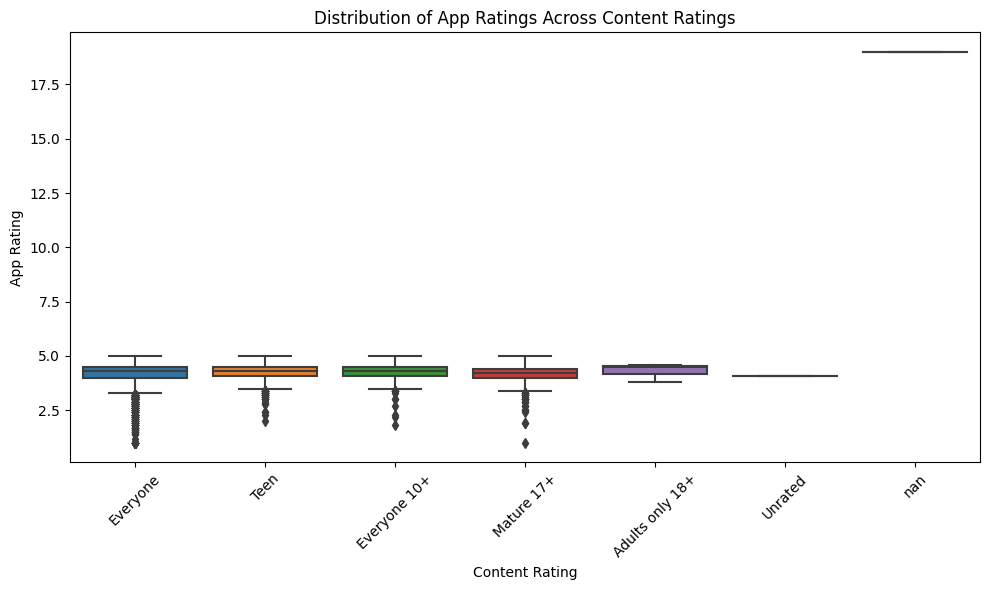

In [76]:
mp.figure(figsize=(10, 6))
sb.boxplot(x='Content Rating', y='Rating', data=df_clean)

mp.title('Distribution of App Ratings Across Content Ratings')
mp.xlabel('Content Rating')
mp.ylabel('App Rating')
mp.xticks(rotation=45)
mp.tight_layout()
mp.show()

5.Which genres have the most apps with over 1 million installs?


In [77]:
df['Installs'] = pd.to_numeric(df['Installs'].astype(str).str.replace('+', '').str.replace(',', ''), errors='coerce')

In [78]:
high_install_apps = df[df['Installs'] > 1_000_000]


In [79]:
genre_counts = high_install_apps.groupby('Genres').size().reset_index(name='App Count')


In [80]:
genre_counts = genre_counts.sort_values(by='App Count', ascending=False)


In [81]:
print(genre_counts.head(10))

           Genres  App Count
79          Tools        187
0          Action        182
61    Photography        161
25  Communication        146
62   Productivity        124
5          Arcade        113
76         Sports        109
75         Social        107
39  Entertainment        103
72       Shopping         91


6.How frequently do apps get updated? Calculate the average time between updates.


In [82]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [83]:
df_sorted = df.sort_values(by=['App', 'Last Updated'])

In [84]:
df_sorted['Update_Diff'] = df_sorted.groupby('App')['Last Updated'].diff()

In [85]:
average_update_time = df_sorted['Update_Diff'].mean()

In [86]:
print("Average time between updates:", average_update_time)

Average time between updates: 7 days 21:06:42.292263610


7.What is the impact of app size on the number of installs?


In [87]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

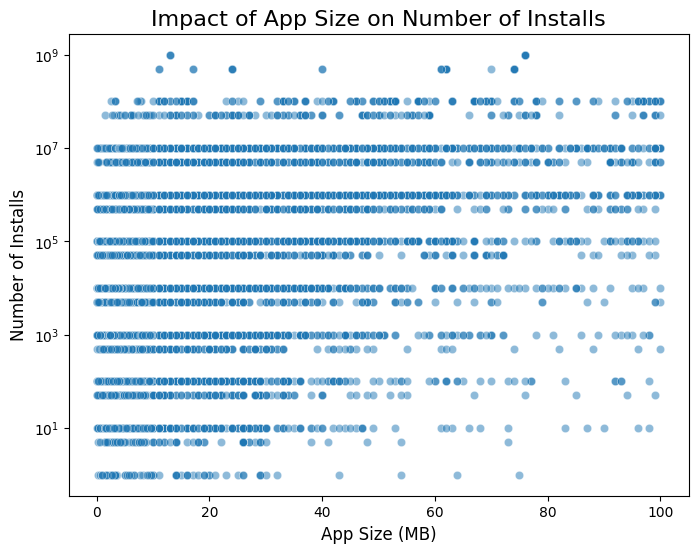

In [88]:
mp.figure(figsize=(8,6))
sb.scatterplot(x='Size', y='Installs', data=df, alpha=0.5)

mp.title('Impact of App Size on Number of Installs', fontsize=16)
mp.xlabel('App Size (MB)', fontsize=12)
mp.ylabel('Number of Installs', fontsize=12)
mp.yscale('log')  # Use log scale for installs for better visibility
mp.show()


8.Which apps have the highest number of reviews, and what are their ratings?

In [89]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [90]:
top_reviewed_apps = df.sort_values(by='Reviews', ascending=False)[['App', 'Reviews', 'Rating']].head(10)


In [91]:
print(top_reviewed_apps)

                                           App   Reviews  Rating
2544                                  Facebook  78158306     4.1
3943                                  Facebook  78128208     4.1
336                         WhatsApp Messenger  69119316     4.4
3904                        WhatsApp Messenger  69109672     4.4
2604                                 Instagram  66577446     4.5
2545                                 Instagram  66577313     4.5
3909                                 Instagram  66509917     4.5
382   Messenger – Text and Video Chat for Free  56646578     4.0
335   Messenger – Text and Video Chat for Free  56642847     4.0
1879                            Clash of Clans  44893888     4.6


9.How does the content rating distribution differ between free and paid apps?

In [92]:
content_rating_distribution = pd.crosstab(df['Content Rating'], df['Type'])

In [93]:
print(content_rating_distribution)


Type             0  Free  Paid
Content Rating                
Adults only 18+  0     3     0
Everyone         0  7720   662
Everyone 10+     0   344    32
Mature 17+       0   428    19
Teen             0  1094    52
Unrated          0     2     0
nan              1     0     0


10.What are the top 5 categories with the most installs?


In [94]:
top_categories = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(5)

In [95]:
print(top_categories)


Category
GAME             3.154402e+10
COMMUNICATION    2.415228e+10
SOCIAL           1.251387e+10
PRODUCTIVITY     1.246309e+10
TOOLS            1.145277e+10
Name: Installs, dtype: float64


**Adavnced Level Questions**

1.What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?


In [96]:
df['Installs'] = df['Installs'].replace('[+,]', '', regex=True).astype(float)


In [101]:
top_10_rated = df_clean[df_clean['Reviews'] > 100]

In [102]:
top_10_rated = top_10_rated.sort_values(by=['Rating', 'Reviews'], ascending=[False, False]).head(10)

In [103]:
top_10_rated = top_10_rated[['App', 'Rating', 'Reviews', 'Installs']]

In [104]:
print(top_10_rated)

                                                     App  Rating  Reviews  \
10357                                         Ríos de Fe     5.0      141   
10301  FD Calculator (EMI, SIP, RD & Loan Eligilibility)     5.0      104   
8058                                          Oración CX     5.0      103   
9625                                          JW Library     4.9   922752   
1260                   Six Pack in 30 Days - Abs Workout     4.9   272337   
4854                   Six Pack in 30 Days - Abs Workout     4.9   272172   
79                               Tickets + PDA 2018 Exam     4.9   197136   
712       Learn Japanese, Korean, Chinese Offline & Free     4.9   133136   
2344                                      Period Tracker     4.9   100082   
1307   StrongLifts 5x5 Workout Gym Log & Personal Tra...     4.9    66791   

         Installs  
10357      1000.0  
10301      1000.0  
8058       5000.0  
9625   10000000.0  
1260   10000000.0  
4854   10000000.0  
79      1000

2.Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?


In [105]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [106]:
df = df.dropna(subset=['Last Updated'])

In [107]:
df['YearMonth'] = df['Last Updated'].dt.to_period('M')

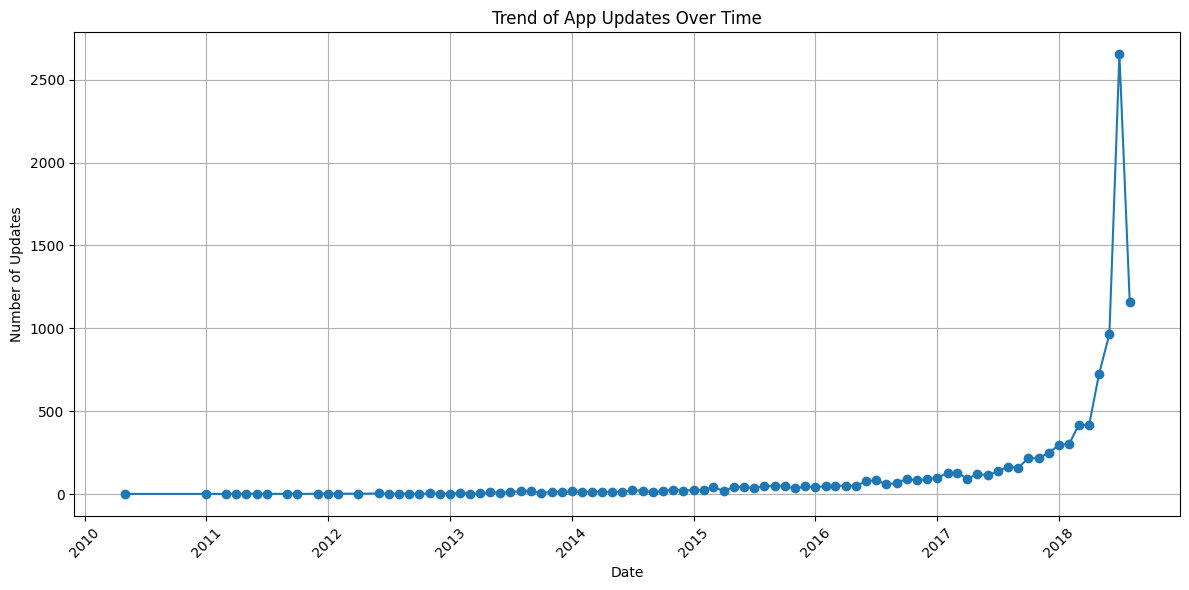

In [110]:
mp.figure(figsize=(12,6))
mp.plot(update_trend['YearMonth'], update_trend['Update_Count'], marker='o')
mp.title('Trend of App Updates Over Time')
mp.xlabel('Date')
mp.ylabel('Number of Updates')
mp.grid(True)
mp.xticks(rotation=45)
mp.tight_layout()
mp.show()

3.How does the average rating of apps change with the number of installs? Create a binned analysis.


In [111]:
print("Non-convertible to numeric count:", df['Installs'].isna().sum())

Non-convertible to numeric count: 0


In [112]:
print(df['Installs'].head())

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64


In [113]:
print(df['Installs'].dtype)

float64


4.Perform sentiment analysis on app reviews (if review text is available) to determine the common themes in high and low-rated apps.


In [116]:
high_rated = df[df['Rating'] >= 4.0]
low_rated = df[df['Rating'] < 4.0]

In [117]:
print("High rated apps average installs:", high_rated['Installs'].mean())
print("Low rated apps average installs:", low_rated['Installs'].mean())


High rated apps average installs: 19920304.903267596
Low rated apps average installs: 4236294.6915167095


In [118]:
print("High rated apps average reviews:", high_rated['Reviews'].mean())
print("Low rated apps average reviews:", low_rated['Reviews'].mean())

High rated apps average reviews: 599412.3162516194
Low rated apps average reviews: 20467.91568123393


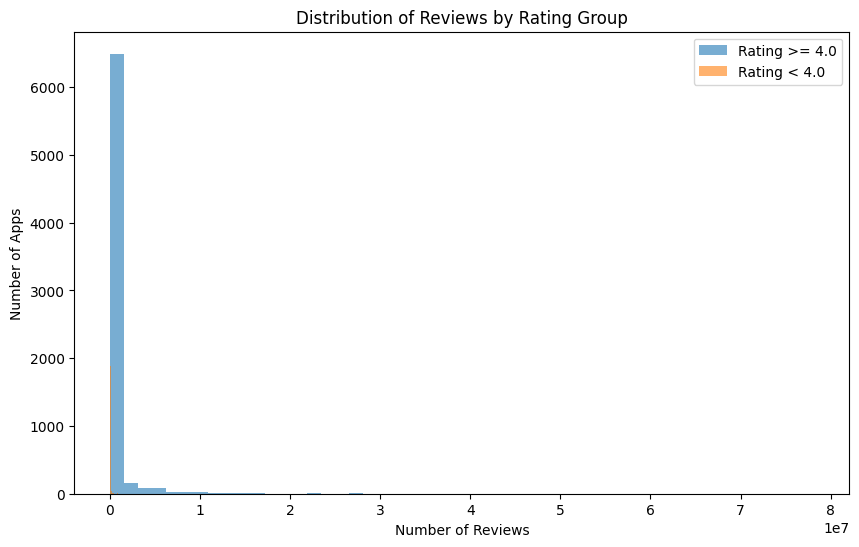

In [119]:
mp.figure(figsize=(10,6))
mp.hist(high_rated['Reviews'], bins=50, alpha=0.6, label='Rating >= 4.0')
mp.hist(low_rated['Reviews'], bins=50, alpha=0.6, label='Rating < 4.0')
mp.xlabel('Number of Reviews')
mp.ylabel('Number of Apps')
mp.title('Distribution of Reviews by Rating Group')
mp.legend()
mp.show()


5.What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?


In [120]:
df_clean = df.replace([np.inf, -np.inf], np.nan)

In [121]:
cols_of_interest = ['Rating', 'Installs']
df_clean = df_clean.dropna(subset=cols_of_interest)

In [122]:
correlation = df_clean['Rating'].corr(df_clean['Installs'])

In [123]:
print(f"Correlation between Rating and Installs: {correlation}")

Correlation between Rating and Installs: 0.05088596249846876


In [124]:
cat_stats = df.groupby('Category').agg({'Rating':'mean', 'Installs':'sum'}).sort_values(by='Rating', ascending=False)

In [125]:
print(cat_stats.head(10))


                       Rating      Installs
Category                                   
EVENTS               4.435556  1.597316e+07
EDUCATION            4.375969  5.339520e+08
ART_AND_DESIGN       4.358065  1.243381e+08
BOOKS_AND_REFERENCE  4.347458  1.916470e+09
PERSONALIZATION      4.333871  2.074495e+09
PARENTING            4.300000  3.152111e+07
GAME                 4.281285  3.154402e+10
BEAUTY               4.278571  2.719705e+07
HEALTH_AND_FITNESS   4.261450  1.361023e+09
SOCIAL               4.254918  1.251387e+10


In [131]:
df = df.replace([np.inf, -np.inf], np.nan)

In [132]:
df = df.dropna(subset=['Rating'])

In [133]:
genre_rating_stats = (
    df.groupby('Genres')['Rating']
      .agg(['mean', 'median'])
      .sort_values(by='mean', ascending=False)
)

In [134]:
print(genre_rating_stats)


                                         mean  median
Genres                                               
Comics;Creativity                    4.800000    4.80
Board;Pretend Play                   4.800000    4.80
Health & Fitness;Education           4.700000    4.70
Puzzle;Education                     4.600000    4.60
Adventure;Brain Games                4.600000    4.60
...                                       ...     ...
Health & Fitness;Action & Adventure  3.900000    3.90
Art & Design;Pretend Play            3.900000    3.90
Educational                          3.871875    3.95
Parenting;Education                  3.866667    3.90
Parenting;Brain Games                3.800000    3.80

[115 rows x 2 columns]
